In [310]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

2025-01-13 16:12:02.221973: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [306]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 MB 11.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 8.8 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 20.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 22.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.0/601.0 kB 10.6 MB/s eta 0:00:00


In [211]:
#Load data
df = pd.read_csv('diabetes_dataset.csv')

#Read first few lines
print(df.head())

   year  gender   age location  race:AfricanAmerican  race:Asian  \
0  2020  Female  32.0  Alabama                     0           0   
1  2015  Female  29.0  Alabama                     0           1   
2  2015    Male  18.0  Alabama                     0           0   
3  2015    Male  41.0  Alabama                     0           0   
4  2016  Female  52.0  Alabama                     1           0   

   race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0               0              0           1             0              0   
1               0              0           0             0              0   
2               0              0           1             0              0   
3               1              0           0             0              0   
4               0              0           0             0              0   

  smoking_history    bmi  hbA1c_level  blood_glucose_level  diabetes  
0           never  27.32          5.0                  10

In [212]:
#Summary statistics
df.describe(include='all')

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,NaN,3,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,NaN,Female,NaN,Iowa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,NaN,58552,NaN,2038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,2018.360820,NaN,41.885856,NaN,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,1.345239,NaN,22.516840,NaN,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,2015.000000,NaN,0.080000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,NaN,24.000000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,NaN,43.000000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,NaN,60.000000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


From above table we can see data is collected from year 2015 to 2022, between age 0.08 and 80, bmi between 10.01 and 95.69.

Questions:
1. What is the distribution of race?&Can a person have two different races?
2. Trend of diabetes YoY.
3. Relationship between diabetes and other factors(bmi,hypertension,heart disease,hbA1c level, smoking history and bloood glucose level)?
4. Age distribution among different groups(diabetes/smoking)?
5. Location distribution of population.
6. Diabetes distribution in gender?

In [215]:
#Answer Q1
#First is to give each line a Patient ID
df["id"] = df.index
#Add values for all race columns
df["sum_race"] = df[["race:AfricanAmerican","race:Asian","race:Caucasian","race:Hispanic","race:Other"]].sum(axis=1)
df.describe()
df.drop('sum_race', axis=1, inplace=True)

From race above summary statistics, a person can't have more than 1 race attibute. From mean of different race, we could see the value is around 0.2. Therefore, the race distribution does not align with population race distribution. Sample is not randomly collected from the population.

year  diabetes
2015  0            8001
      1             759
2016  0            7995
      1             765
2018  0            2435
      1             243
2019  0           73018
      1            6727
2020  0              39
      1               3
2021  0               6
      1               1
2022  0               6
      1               2
Name: diabetes, dtype: int64


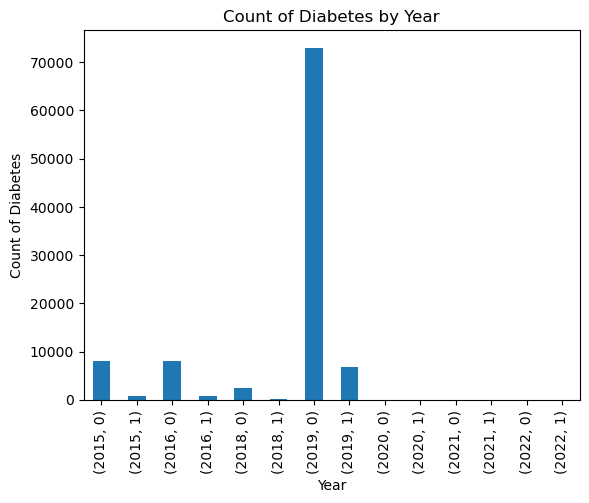

In [217]:
#Answer Q2
#Aggregate data then plot

aggregated_data = df.groupby(['year','diabetes'])['diabetes'].count() 
print(aggregated_data)

aggregated_data.plot(kind='bar')
plt.title('Count of Diabetes by Year')
plt.xlabel('Year')
plt.ylabel('Count of Diabetes')
plt.show()



We can see the diabete patients are not evenly spreaded across the years. We might need to take log transformation of results.

In [219]:
#Answer Q3
# Importing library
import pandas as pd
from scipy.stats import f_oneway

# Separate the data into groups based on the 'Group' column
groups = [df['bmi'][df['diabetes'] == group] for group in df['diabetes'].unique()]

# Perform the ANOVA test
f_statistic, p_value = f_oneway(*groups)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 4816.113932175362
P-value: 0.0


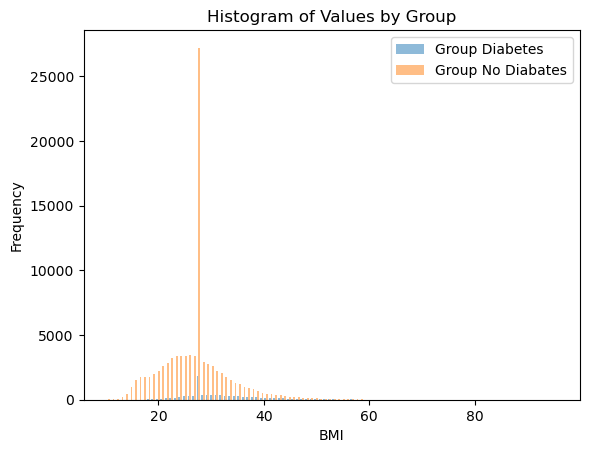

In [220]:

# Plot histograms
plt.hist([df[df['diabetes'] == 1]['bmi'], df[df['diabetes'] == 0]['bmi']], 
         bins=100, alpha=0.5, label=['Group Diabetes', 'Group No Diabates'])
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of Values by Group')
plt.show()

In [221]:

# Create bins by group
df['bin'] = df.groupby('diabetes')['bmi'].transform(lambda x: pd.cut(x, bins=50, labels=False))
# Filter dataframe based on bin
filtered_df = df[df['bin'] == 10]
filtered_df.describe()


,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,id,bin
count,32246.000000,32246.000000,32246.000000,32246.000000,32246.000000,32246.000000,32246.000000,32246.000000,32246.000000,32246.000000,32246.000000,32246.000000,32246.000000,32246.000000,32246.0
mean,2018.366061,45.075916,0.203746,0.198722,0.195838,0.202785,0.198908,0.060566,0.036191,27.447070,5.496921,137.185449,0.064938,49773.052906,10.0
std,1.339536,21.291683,0.402789,0.399045,0.396851,0.402080,0.399185,0.238536,0.186767,0.342261,1.050983,39.246310,0.246421,28739.168039,0.0
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.530000,3.500000,80.000000,0.000000,0.000000,10.0
25%,2019.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.320000,4.800000,100.000000,0.000000,24888.250000,10.0
50%,2019.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000,49903.500000,10.0
75%,2019.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.320000,6.200000,159.000000,0.000000,74432.250000,10.0
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.850000,9.000000,300.000000,1.000000,99991.000000,10.0


From the histogram above, there was a spike in the plot which signaled there was an abnormal reading for bmi. We discovered that there were many bmi values of 27.32, probably default value. We will need to find out how to deal with this.

In [223]:
#Create a contingency table

contingency_table = pd.crosstab(df['diabetes'], df['smoking_history'])

print(contingency_table)

def perform_chi_square_test(data, col1, col2):
    # Creating a contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])

    # Performing the Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Interpreting the result
    significant = p < 0.05  # 5% significance level
    return chi2, p, significant


# Additional aspects to test in the Mathematics dataset
additional_aspects_to_test = {
    'Diabetes and hypertension': ('diabetes', 'hypertension'),
    'Diabetes and heart disease': ('diabetes', 'heart_disease'),
    'Diabetes and smoking history': ('diabetes', 'smoking_history')

}
# Performing the additional tests for Mathematics dataset
additional_mat_chi_square_results = {aspect: perform_chi_square_test(df, *columns) for aspect, columns in additional_aspects_to_test.items()}
additional_mat_chi_square_results

smoking_history  No Info  current  ever  former  never  not current
diabetes                                                           
0                  34362     8338  3532    7762  31749         5757
1                   1454      948   472    1590   3346          690


{'Diabetes and hypertension': (3910.708546826595, 0.0, True),
 'Diabetes and heart disease': (2945.847521829186, 0.0, True),
 'Diabetes and smoking history': (1956.0944200848764, 0.0, True)}

Clearly there is a relationship between hypertension and diabetes. There is also a relationship between heart disease and diabetes.

In [225]:
#Answer Q3
# Importing library
import pandas as pd
from scipy.stats import f_oneway

# Separate the data into groups based on the 'Group' column
groups = [df['hbA1c_level'][df['diabetes'] == group] for group in df['diabetes'].unique()]

# Perform the ANOVA test
f_statistic, p_value = f_oneway(*groups)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 19122.2111838759
P-value: 0.0


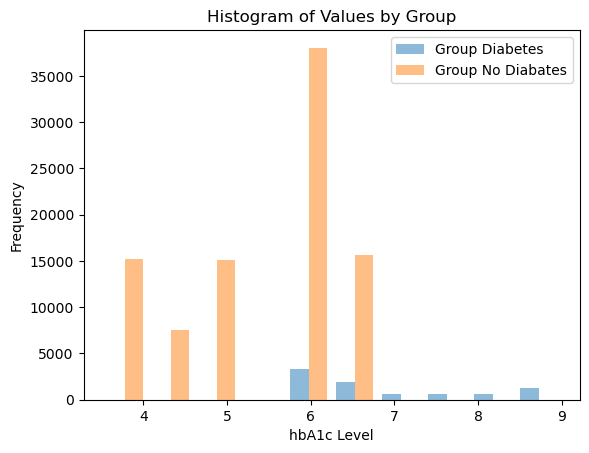

In [226]:
# Plot histograms
plt.hist([df[df['diabetes'] == 1]['hbA1c_level'], df[df['diabetes'] == 0]['hbA1c_level']], 
         bins=10, alpha=0.5, label=['Group Diabetes', 'Group No Diabates'])
plt.legend()
plt.xlabel('hbA1c Level')
plt.ylabel('Frequency')
plt.title('Histogram of Values by Group')
plt.show()

There is a strong relationship between hbA1c level and diabetes.

In [228]:
# Separate the data into groups based on the 'Group' column
groups = [df['blood_glucose_level'][df['diabetes'] == group] for group in df['diabetes'].unique()]

# Perform the ANOVA test
f_statistic, p_value = f_oneway(*groups)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 21363.054361421557
P-value: 0.0


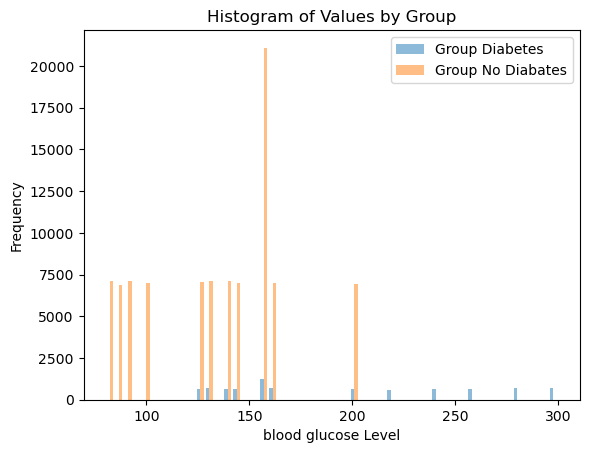

In [229]:
# Plot histograms
plt.hist([df[df['diabetes'] == 1]['blood_glucose_level'], df[df['diabetes'] == 0]['blood_glucose_level']], 
         bins=50, alpha=0.5, label=['Group Diabetes', 'Group No Diabates'])
plt.legend()
plt.xlabel('blood glucose Level')
plt.ylabel('Frequency')
plt.title('Histogram of Values by Group')
plt.show()

There is a relationship between blood glucose level and diabetes.

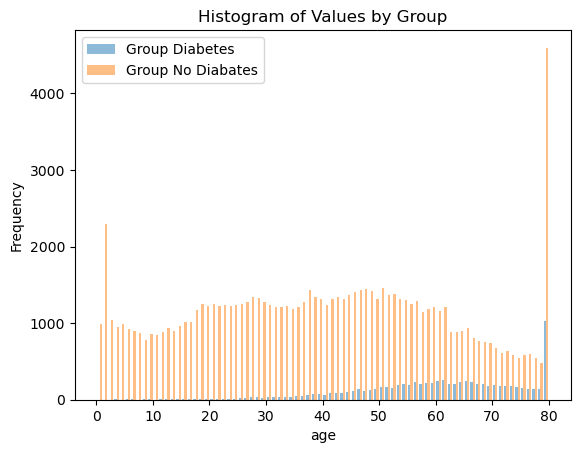

In [231]:
# Plot histograms
plt.hist([df[df['diabetes'] == 1]['age'], df[df['diabetes'] == 0]['age']], 
         bins=80, alpha=0.5, label=['Group Diabetes', 'Group No Diabates'])
plt.legend()
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Histogram of Values by Group')
plt.show()

We found that the older you are, the more likely you'll get diabetes. If you are 20 or younger, then there is relatively small chance you'll have diabetes.

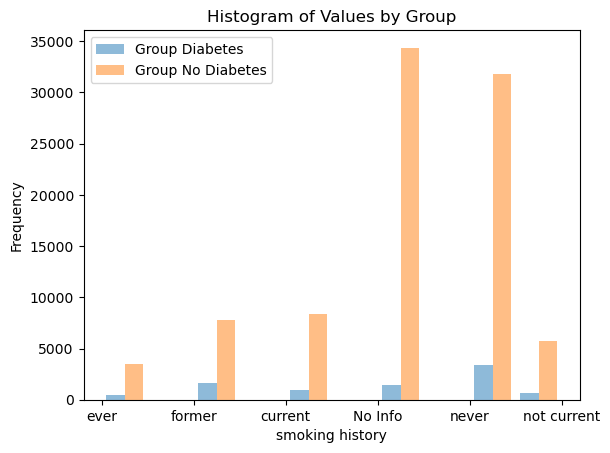

In [233]:
# Plot histograms
plt.hist([df[df['diabetes'] == 1]['smoking_history'], df[df['diabetes'] == 0]['smoking_history']], 
         bins=10, alpha=0.5, label=['Group Diabetes', 'Group No Diabetes'])
plt.legend()
plt.xlabel('smoking history')
plt.ylabel('Frequency')
plt.title('Histogram of Values by Group')
plt.show()

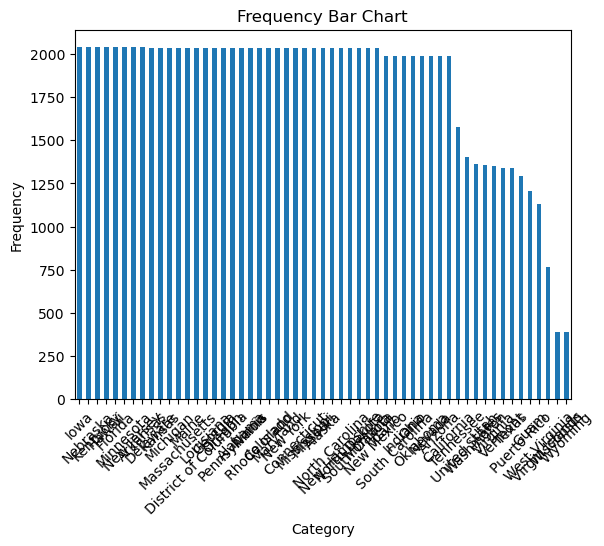

In [234]:
#Frequency plot for patients from different state
frequency = df['location'].value_counts()
frequency.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency Bar Chart')
plt.xticks(rotation=45)
plt.show()

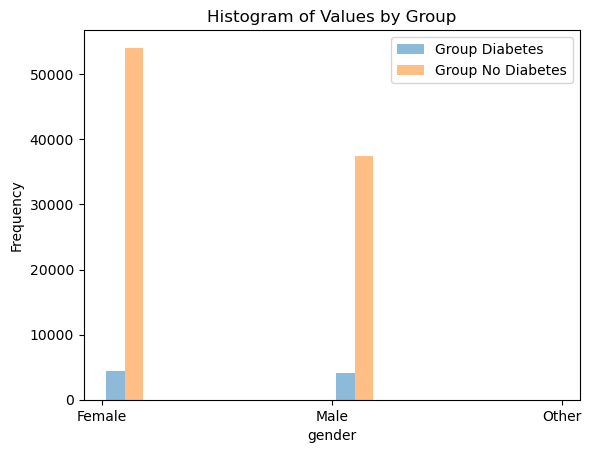

In [235]:
# Plot histograms
plt.hist([df[df['diabetes'] == 1]['gender'], df[df['diabetes'] == 0]['gender']], 
         bins=10, alpha=0.5, label=['Group Diabetes', 'Group No Diabetes'])
plt.legend()
plt.xlabel('gender')
plt.ylabel('Frequency')
plt.title('Histogram of Values by Group')
plt.show()

In [236]:
#Convert into dummy variables
df = pd.get_dummies(df, columns=['gender'], drop_first=True)
df = pd.get_dummies(df, columns=['smoking_history'], drop_first=True)

df.drop('location', axis=1, inplace=True)


In [237]:

# Assuming X is your feature data and y is your target variable

X = df.loc[:, df.columns != 'diabetes']
y = df.loc[:, df.columns == 'diabetes']

#Normalizing data here

# Create a scaler object to normalize the data
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#Data segregation into training data and test data by 0.3
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['diabetes'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['diabetes']==0]))
print("Number of subscription",len(os_data_y[os_data_y['diabetes']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['diabetes']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['diabetes']==1])/len(os_data_X))


length of oversampled data is  128114
Number of no subscription in oversampled data 64057
Number of subscription 64057
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [238]:
#Select features use
data_final_vars=df.columns.values.tolist()
y=['diabetes']
X=[i for i in data_final_vars if i not in y]



logreg = LogisticRegression()
rfe = RFE(logreg, step=10,n_features_to_select=6)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


[False  True False False False False False False False  True  True  True
 False  True False  True False False False False False]
[3 1 3 2 2 2 2 3 3 1 1 1 3 1 3 1 2 3 3 3 3]


In [239]:
#Create a list of features for modeling
true_false_list = rfe.support_
values_list =data_final_vars

result_list = [value for is_true, value in zip(true_false_list, values_list) if is_true]

print(result_list)


['age', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'id', 'gender_Male']


In [240]:
print(X)

['year', 'age', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'id', 'bin', 'gender_Male', 'gender_Other', 'smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_not current']


In [241]:
#Start with logistic regression

X=os_data_X[result_list]

y=os_data_y


logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.535591
         Iterations 6
                           Results: Logit
Model:               Logit             Method:            MLE        
Dependent Variable:  diabetes          Pseudo R-squared:  0.227      
Date:                2025-01-07 16:09  AIC:               137245.5281
No. Observations:    128114            BIC:               137304.0921
Df Model:            5                 Log-Likelihood:    -68617.    
Df Residuals:        128108            LL-Null:           -88802.    
Converged:           1.0000            LLR p-value:       0.0000     
No. Iterations:      6.0000            Scale:             1.0000     
---------------------------------------------------------------------
                     Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
age                  0.7525   0.0260   28.9135 0.0000  0.7015  0.8035
bmi             

In [242]:
print(X)

             age       bmi  hbA1c_level  blood_glucose_level        id  \
0       0.887387  0.186275     0.272727             0.295455  0.428654   
1       0.349349  0.202031     0.563636             0.045455  0.914469   
2       0.899900  0.223156     0.563636             0.363636  0.663747   
3       0.687187  0.231443     0.563636             0.022727  0.791068   
4       0.937437  0.202031     0.418182             0.227273  0.134041   
...          ...       ...          ...                  ...       ...   
128109  0.749220  0.292917     0.490909             0.363636  0.242255   
128110  0.981538  0.248811     0.666759             0.298801  0.872656   
128111  0.672738  0.279620     0.650466             0.505083  0.502728   
128112  0.397205  0.291238     0.749306             0.209091  0.499306   
128113  0.772205  0.211970     0.435617             0.487542  0.237494   

        gender_Male  
0               0.0  
1               1.0  
2               0.0  
3               1.0  
4

In [243]:
print(os_data_y['diabetes'])

0         0
1         0
2         0
3         0
4         0
         ..
128109    1
128110    1
128111    1
128112    1
128113    1
Name: diabetes, Length: 128114, dtype: int64


In [244]:


logit_model=sm.Logit(os_data_y,os_data_X[result_list].astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.535591
         Iterations 6
                           Results: Logit
Model:               Logit             Method:            MLE        
Dependent Variable:  diabetes          Pseudo R-squared:  0.227      
Date:                2025-01-07 16:09  AIC:               137245.5281
No. Observations:    128114            BIC:               137304.0921
Df Model:            5                 Log-Likelihood:    -68617.    
Df Residuals:        128108            LL-Null:           -88802.    
Converged:           1.0000            LLR p-value:       0.0000     
No. Iterations:      6.0000            Scale:             1.0000     
---------------------------------------------------------------------
                     Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
age                  0.7525   0.0260   28.9135 0.0000  0.7015  0.8035
bmi             

In [274]:



#Fitting model
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())


LogisticRegression()

In [276]:
#Prediction
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


In [278]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[27236   207]
 [  942  1615]]


Our logistic regression model prediction is 96% accurate. We will continue on other moding method.

In [290]:
from sklearn.ensemble import RandomForestClassifier
# Create the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth = 5, random_state = 42)

# Fit the model to the training data
rf_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=5, random_state=42)

In [291]:
y_pred = rf_model.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf_model.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.97


In [294]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test, y_pred)
print(confusion_matrix2)

[[27443     0]
 [  851  1706]]


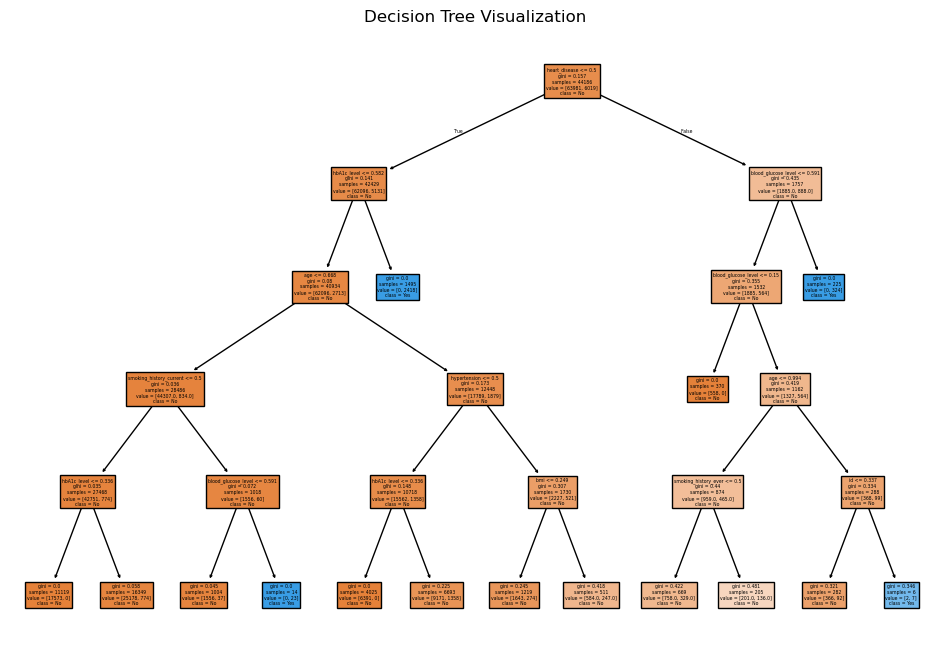

In [302]:
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# # Visualize the decision tree
# plt.figure(figsize=(12, 8))
# plot_tree(rf_model.estimators_[2], feature_names= df.columns, class_names=['No', 'Yes'], filled=True)
# plt.title("Decision Tree Visualization")
# plt.show()

In [314]:
# Create the model
model = Sequential([
    Dense(64, activation='tanh', input_shape=(os_data_X.shape[1],)), # Input layer
    Dense(32, activation='relu'),                                  # Hidden layer
    Dense(64, activation='softmax'),                                # Hidden layer
    Dense(pd.DataFrame(os_data_y).shape[1], activation='sigmoid')     # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.003),
              loss = "binary_crossentropy", #sparse_categorical_crossentropy, mean_squared_error, binary_crossentropy
              metrics=['accuracy'])
epochs = 25
model_fit = model.fit(os_data_X, os_data_y, epochs=epochs, validation_split=0.2)

Epoch 1/25


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3203/3203 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8652 - loss: 0.3613 - val_accuracy: 0.8230 - val_loss: 0.3332
Epoch 2/25
3203/3203 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8977 - loss: 0.2253 - val_accuracy: 0.8303 - val_loss: 0.3535
Epoch 3/25
3203/3203 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9090 - loss: 0.1907 - val_accuracy: 0.9031 - val_loss: 0.2182
Epoch 4/25
3203/3203 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9147 - loss: 0.1771 - val_accuracy: 0.9273 - val_loss: 0.1737
Epoch 5/25
3203/3203 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9184 - loss: 0.1728 - val_accuracy: 0.8826 - val_loss: 0.2335
Epoch 6/25
3203/3203 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9188 - loss: 0.1697 - val_accuracy: 0.9365 - val_loss: 0.1516
Epoch 7/25
3203/3203 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9204 - loss: 0.1661 - val_accuracy: 0.9269 - val_loss: 0.1572
Epoch 8/25
3203/3203 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9206 - loss: 0.1660 - val_accurac

In [316]:
y_hat = model.predict(X_test)
y_hat = [1 if p >= 0.5 else 0 for p in y_hat]
print(sum(y_hat), len(y_hat)-sum(y_hat))

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step
3621 26379


In [320]:
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                            recall_score, f1_score, precision_score, recall_score)

# confusion matrix
cm = confusion_matrix(y_test, y_hat)  
print ("Confusion Matrix : \n", cm)  
  
# Evaluate the model
print('Test accuracy = ', accuracy_score(y_test, y_hat))
print('Test precison = ', precision_score(y_test, y_hat))
print('Test recall = ', recall_score(y_test, y_hat))

Confusion Matrix : 
 [[26119  1324]
 [  260  2297]]
Test accuracy =  0.9472
Test precison =  0.6343551505109086
Test recall =  0.8983183418068048


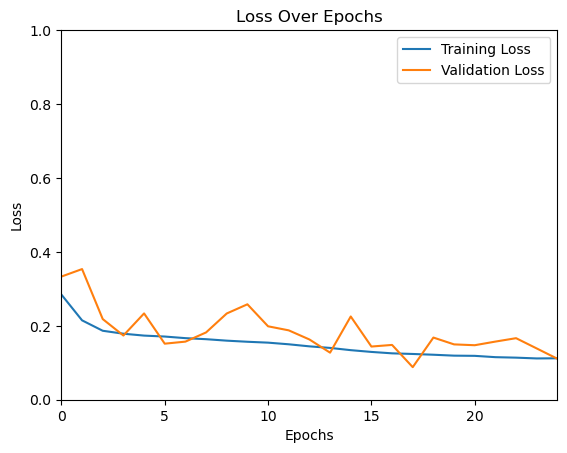

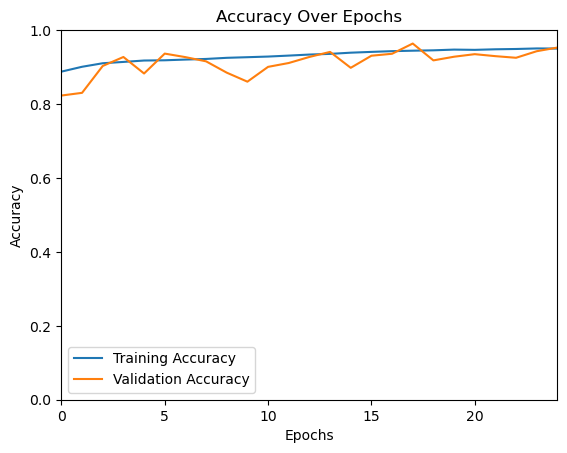

In [322]:
# Plot loss
plt.plot(model_fit.history['loss'], label='Training Loss')
plt.plot(model_fit.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(0,epochs-1)
plt.ylim(0,1)
plt.show()

# Plot accuracy
plt.plot(model_fit.history['accuracy'], label='Training Accuracy')
plt.plot(model_fit.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim(0,epochs-1)
plt.ylim(0,1)
plt.show()